Machine ID 28
PRN 230340125007

In [75]:
import pandas as pd
import numpy as np
from sklearn.metrics import log_loss, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression, Lasso
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib import pyplot as plt
import os


metric used for the comparison of algorithms is log_loss since it is classification problem

In [5]:
os.chdir(r"C:\Users\Administrator.DBDA\Desktop\PML_SET_A")

In [65]:
wine = pd.read_csv("wine.csv")
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [66]:
X = wine.drop(['target'],axis = 1)
y = wine['target']

## Preliminary Decision Tree

In [74]:
clf = DecisionTreeClassifier(random_state=23)
params = {'max_depth':[None, 2, 3, 4, 5],
          'min_samples_split': np.arange(2,21,2),
          'min_samples_leaf': np.arange(1,21,2)}
kfold = KFold(n_splits=5, shuffle=True, random_state=23)
gcv = GridSearchCV(clf, param_grid=params,verbose=3,
                   cv=kfold, scoring='neg_log_loss')
gcv.fit(X, y)


Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-1.001 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-3.004 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-2.002 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-6.179 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-2.060 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=4;, score=-1.001 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=4;, score=-3.004 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=4;, score=-2.002 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=4;, score=-6.190 total time=   0.0s
[CV 5/5] 

[CV 2/5] END max_depth=None, min_samples_leaf=3, min_samples_split=16;, score=-3.091 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=3, min_samples_split=16;, score=-2.086 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=3, min_samples_split=16;, score=-2.322 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=3, min_samples_split=16;, score=-0.109 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=3, min_samples_split=18;, score=-1.013 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=3, min_samples_split=18;, score=-3.091 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=3, min_samples_split=18;, score=-2.086 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=3, min_samples_split=18;, score=-2.322 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=3, min_samples_split=18;, score=-0.109 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=3, min_samples_spl

[CV 5/5] END max_depth=None, min_samples_leaf=7, min_samples_split=10;, score=-1.114 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=7, min_samples_split=12;, score=-0.058 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=7, min_samples_split=12;, score=-3.235 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=7, min_samples_split=12;, score=-1.038 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=7, min_samples_split=12;, score=-1.416 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=7, min_samples_split=12;, score=-1.114 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=7, min_samples_split=14;, score=-0.058 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=7, min_samples_split=14;, score=-3.235 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=7, min_samples_split=14;, score=-1.038 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=7, min_samples_spl

[CV 3/5] END max_depth=None, min_samples_leaf=11, min_samples_split=6;, score=-0.093 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=11, min_samples_split=6;, score=-2.466 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=11, min_samples_split=6;, score=-1.268 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=11, min_samples_split=8;, score=-0.031 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=11, min_samples_split=8;, score=-2.294 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=11, min_samples_split=8;, score=-0.093 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=11, min_samples_split=8;, score=-2.466 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=11, min_samples_split=8;, score=-1.268 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=11, min_samples_split=10;, score=-0.031 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=11, min_samples_s

[CV 1/5] END max_depth=None, min_samples_leaf=15, min_samples_split=2;, score=-0.082 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=15, min_samples_split=2;, score=-3.346 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=15, min_samples_split=2;, score=-0.112 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=15, min_samples_split=2;, score=-0.545 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=15, min_samples_split=2;, score=-1.310 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=15, min_samples_split=4;, score=-0.082 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=15, min_samples_split=4;, score=-3.346 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=15, min_samples_split=4;, score=-0.112 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=15, min_samples_split=4;, score=-0.545 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=15, min_samples_sp

[CV 1/5] END max_depth=None, min_samples_leaf=17, min_samples_split=16;, score=-0.113 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=17, min_samples_split=16;, score=-1.489 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=17, min_samples_split=16;, score=-0.123 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=17, min_samples_split=16;, score=-0.594 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=17, min_samples_split=16;, score=-1.293 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=17, min_samples_split=18;, score=-0.113 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=17, min_samples_split=18;, score=-1.489 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=17, min_samples_split=18;, score=-0.123 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=17, min_samples_split=18;, score=-0.594 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=17, min_s

[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=12;, score=-0.291 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=12;, score=-1.537 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=12;, score=-0.359 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=14;, score=-0.279 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=14;, score=-2.538 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=14;, score=-0.291 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=14;, score=-1.537 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=14;, score=-0.359 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=16;, score=-0.279 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=16;, score=-2.538 total tim

[CV 3/5] END max_depth=2, min_samples_leaf=5, min_samples_split=8;, score=-0.200 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=5, min_samples_split=8;, score=-0.585 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=5, min_samples_split=8;, score=-0.315 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=5, min_samples_split=10;, score=-0.279 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=5, min_samples_split=10;, score=-2.538 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=5, min_samples_split=10;, score=-0.200 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=5, min_samples_split=10;, score=-0.585 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=5, min_samples_split=10;, score=-0.315 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=5, min_samples_split=12;, score=-0.279 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=5, min_samples_split=12;, score=-2.538 total time= 

[CV 5/5] END max_depth=2, min_samples_leaf=9, min_samples_split=4;, score=-0.341 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=9, min_samples_split=6;, score=-0.279 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=9, min_samples_split=6;, score=-1.586 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=9, min_samples_split=6;, score=-0.207 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=9, min_samples_split=6;, score=-0.656 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=9, min_samples_split=6;, score=-0.341 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=9, min_samples_split=8;, score=-0.279 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=9, min_samples_split=8;, score=-1.586 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=9, min_samples_split=8;, score=-0.207 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=9, min_samples_split=8;, score=-0.656 total time=   0.0s


[CV 4/5] END max_depth=2, min_samples_leaf=13, min_samples_split=2;, score=-0.676 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=13, min_samples_split=2;, score=-0.353 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=13, min_samples_split=4;, score=-0.279 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=13, min_samples_split=4;, score=-1.606 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=13, min_samples_split=4;, score=-0.217 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=13, min_samples_split=4;, score=-0.676 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=13, min_samples_split=4;, score=-0.353 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=13, min_samples_split=6;, score=-0.279 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=13, min_samples_split=6;, score=-1.606 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=13, min_samples_split=6;, score=-0.217 total tim

[CV 3/5] END max_depth=2, min_samples_leaf=15, min_samples_split=20;, score=-0.221 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=15, min_samples_split=20;, score=-0.676 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=15, min_samples_split=20;, score=-0.368 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=17, min_samples_split=2;, score=-0.279 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=17, min_samples_split=2;, score=-1.651 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=17, min_samples_split=2;, score=-0.230 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=17, min_samples_split=2;, score=-1.651 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=17, min_samples_split=2;, score=-0.374 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=17, min_samples_split=4;, score=-0.279 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=17, min_samples_split=4;, score=-1.651 total 

[CV 4/5] END max_depth=2, min_samples_leaf=19, min_samples_split=16;, score=-1.664 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=19, min_samples_split=16;, score=-1.335 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=19, min_samples_split=18;, score=-0.279 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=19, min_samples_split=18;, score=-0.714 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=19, min_samples_split=18;, score=-1.201 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=19, min_samples_split=18;, score=-1.664 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=19, min_samples_split=18;, score=-1.335 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=19, min_samples_split=20;, score=-0.279 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=19, min_samples_split=20;, score=-0.714 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=19, min_samples_split=20;, score=-1.201

[CV 5/5] END max_depth=3, min_samples_leaf=3, min_samples_split=10;, score=-0.109 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=3, min_samples_split=12;, score=-1.013 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=3, min_samples_split=12;, score=-3.106 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=3, min_samples_split=12;, score=-2.086 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=3, min_samples_split=12;, score=-2.322 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=3, min_samples_split=12;, score=-0.109 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=3, min_samples_split=14;, score=-1.013 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=3, min_samples_split=14;, score=-3.106 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=3, min_samples_split=14;, score=-2.086 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=3, min_samples_split=14;, score=-2.322 total tim

[CV 2/5] END max_depth=3, min_samples_leaf=7, min_samples_split=6;, score=-3.235 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=7, min_samples_split=6;, score=-1.038 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=7, min_samples_split=6;, score=-1.416 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=7, min_samples_split=6;, score=-1.114 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=7, min_samples_split=8;, score=-0.058 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=7, min_samples_split=8;, score=-3.235 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=7, min_samples_split=8;, score=-1.038 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=7, min_samples_split=8;, score=-1.416 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=7, min_samples_split=8;, score=-1.114 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=7, min_samples_split=10;, score=-0.058 total time=   0.0s

[CV 1/5] END max_depth=3, min_samples_leaf=11, min_samples_split=2;, score=-0.031 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=11, min_samples_split=2;, score=-2.294 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=11, min_samples_split=2;, score=-0.093 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=11, min_samples_split=2;, score=-2.466 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=11, min_samples_split=2;, score=-1.268 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=11, min_samples_split=4;, score=-0.031 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=11, min_samples_split=4;, score=-2.294 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=11, min_samples_split=4;, score=-0.093 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=11, min_samples_split=4;, score=-2.466 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=11, min_samples_split=4;, score=-1.268 total tim

[CV 5/5] END max_depth=3, min_samples_leaf=13, min_samples_split=18;, score=-1.265 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=13, min_samples_split=20;, score=-0.063 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=13, min_samples_split=20;, score=-2.325 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=13, min_samples_split=20;, score=-0.108 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=13, min_samples_split=20;, score=-0.532 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=13, min_samples_split=20;, score=-1.265 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=15, min_samples_split=2;, score=-0.082 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=15, min_samples_split=2;, score=-3.346 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=15, min_samples_split=2;, score=-0.112 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=15, min_samples_split=2;, score=-0.545 tot

[CV 2/5] END max_depth=3, min_samples_leaf=17, min_samples_split=16;, score=-1.489 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=17, min_samples_split=16;, score=-0.123 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=17, min_samples_split=16;, score=-0.594 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=17, min_samples_split=16;, score=-1.293 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=17, min_samples_split=18;, score=-0.113 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=17, min_samples_split=18;, score=-1.489 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=17, min_samples_split=18;, score=-0.123 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=17, min_samples_split=18;, score=-0.594 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=17, min_samples_split=18;, score=-1.293 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=17, min_samples_split=20;, score=-0.113

[CV 4/5] END max_depth=4, min_samples_leaf=1, min_samples_split=12;, score=-2.322 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=1, min_samples_split=12;, score=-2.063 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=1, min_samples_split=14;, score=-1.013 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=1, min_samples_split=14;, score=-3.091 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=1, min_samples_split=14;, score=-2.002 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=1, min_samples_split=14;, score=-2.322 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=1, min_samples_split=14;, score=-2.063 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=1, min_samples_split=16;, score=-1.013 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=1, min_samples_split=16;, score=-3.091 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=1, min_samples_split=16;, score=-2.002 total tim

[CV 5/5] END max_depth=4, min_samples_leaf=5, min_samples_split=6;, score=-0.124 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=5, min_samples_split=8;, score=-0.032 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=5, min_samples_split=8;, score=-3.135 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=5, min_samples_split=8;, score=-1.037 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=5, min_samples_split=8;, score=-1.391 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=5, min_samples_split=8;, score=-0.124 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=5, min_samples_split=10;, score=-0.032 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=5, min_samples_split=10;, score=-3.135 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=5, min_samples_split=10;, score=-1.037 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=5, min_samples_split=10;, score=-1.391 total time=   0

[CV 3/5] END max_depth=4, min_samples_leaf=9, min_samples_split=2;, score=-0.047 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=9, min_samples_split=2;, score=-1.425 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=9, min_samples_split=2;, score=-1.137 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=9, min_samples_split=4;, score=-0.023 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=9, min_samples_split=4;, score=-2.283 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=9, min_samples_split=4;, score=-0.047 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=9, min_samples_split=4;, score=-1.425 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=9, min_samples_split=4;, score=-1.137 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=9, min_samples_split=6;, score=-0.023 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=9, min_samples_split=6;, score=-2.283 total time=   0.0s


[CV 5/5] END max_depth=4, min_samples_leaf=11, min_samples_split=16;, score=-1.268 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=11, min_samples_split=18;, score=-0.031 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=11, min_samples_split=18;, score=-2.294 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=11, min_samples_split=18;, score=-0.093 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=11, min_samples_split=18;, score=-2.466 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=11, min_samples_split=18;, score=-1.268 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=11, min_samples_split=20;, score=-0.031 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=11, min_samples_split=20;, score=-2.294 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=11, min_samples_split=20;, score=-0.093 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=11, min_samples_split=20;, score=-2.466

[CV 4/5] END max_depth=4, min_samples_leaf=15, min_samples_split=14;, score=-0.545 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=15, min_samples_split=14;, score=-1.310 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=15, min_samples_split=16;, score=-0.082 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=15, min_samples_split=16;, score=-3.346 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=15, min_samples_split=16;, score=-0.112 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=15, min_samples_split=16;, score=-0.545 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=15, min_samples_split=16;, score=-1.310 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=15, min_samples_split=18;, score=-0.082 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=15, min_samples_split=18;, score=-3.346 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=15, min_samples_split=18;, score=-0.112

[CV 5/5] END max_depth=4, min_samples_leaf=19, min_samples_split=12;, score=-1.283 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=19, min_samples_split=14;, score=-0.160 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=19, min_samples_split=14;, score=-0.585 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=19, min_samples_split=14;, score=-1.097 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=19, min_samples_split=14;, score=-0.620 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=19, min_samples_split=14;, score=-1.283 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=19, min_samples_split=16;, score=-0.160 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=19, min_samples_split=16;, score=-0.585 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=19, min_samples_split=16;, score=-1.097 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=19, min_samples_split=16;, score=-0.620

[CV 3/5] END max_depth=5, min_samples_leaf=3, min_samples_split=8;, score=-2.086 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=3, min_samples_split=8;, score=-5.304 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=3, min_samples_split=8;, score=-0.106 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=3, min_samples_split=10;, score=-1.012 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=3, min_samples_split=10;, score=-3.091 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=3, min_samples_split=10;, score=-2.086 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=3, min_samples_split=10;, score=-2.322 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=3, min_samples_split=10;, score=-0.109 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=3, min_samples_split=12;, score=-1.013 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=3, min_samples_split=12;, score=-3.091 total time= 

[CV 3/5] END max_depth=5, min_samples_leaf=7, min_samples_split=2;, score=-1.038 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=7, min_samples_split=2;, score=-1.416 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=7, min_samples_split=2;, score=-1.114 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=7, min_samples_split=4;, score=-0.058 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=7, min_samples_split=4;, score=-3.235 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=7, min_samples_split=4;, score=-1.038 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=7, min_samples_split=4;, score=-1.416 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=7, min_samples_split=4;, score=-1.114 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=7, min_samples_split=6;, score=-0.058 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=7, min_samples_split=6;, score=-3.235 total time=   0.0s


[CV 1/5] END max_depth=5, min_samples_leaf=9, min_samples_split=18;, score=-0.023 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=9, min_samples_split=18;, score=-2.283 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=9, min_samples_split=18;, score=-0.047 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=9, min_samples_split=18;, score=-1.425 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=9, min_samples_split=18;, score=-1.137 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=9, min_samples_split=20;, score=-0.023 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=9, min_samples_split=20;, score=-2.283 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=9, min_samples_split=20;, score=-0.047 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=9, min_samples_split=20;, score=-1.425 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=9, min_samples_split=20;, score=-1.137 total tim

[CV 5/5] END max_depth=5, min_samples_leaf=13, min_samples_split=12;, score=-1.265 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=13, min_samples_split=14;, score=-0.063 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=13, min_samples_split=14;, score=-2.325 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=13, min_samples_split=14;, score=-0.108 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=13, min_samples_split=14;, score=-0.532 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=13, min_samples_split=14;, score=-1.265 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=13, min_samples_split=16;, score=-0.063 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=13, min_samples_split=16;, score=-2.325 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=13, min_samples_split=16;, score=-0.108 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=13, min_samples_split=16;, score=-0.532

[CV 2/5] END max_depth=5, min_samples_leaf=17, min_samples_split=8;, score=-1.489 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=17, min_samples_split=8;, score=-0.123 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=17, min_samples_split=8;, score=-0.594 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=17, min_samples_split=8;, score=-1.293 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=17, min_samples_split=10;, score=-0.113 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=17, min_samples_split=10;, score=-1.489 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=17, min_samples_split=10;, score=-0.123 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=17, min_samples_split=10;, score=-0.594 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=17, min_samples_split=10;, score=-1.293 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=17, min_samples_split=12;, score=-0.113 tot

GridSearchCV(cv=KFold(n_splits=5, random_state=23, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=23),
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])},
             scoring='neg_log_loss', verbose=3)

In [76]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 2, 'min_samples_leaf': 9, 'min_samples_split': 2}
-0.6137408021670152


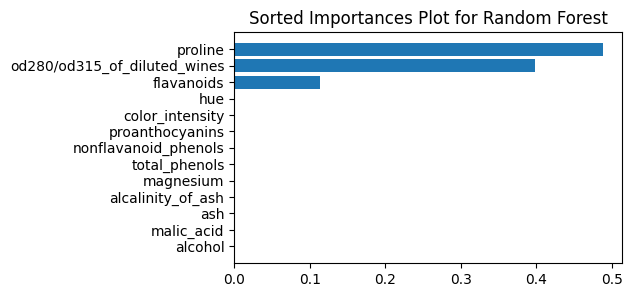

In [48]:
bm_dtr = gcv.best_estimator_

imps = bm_dtr.feature_importances_
cols = list(X.columns)
imp_df = pd.DataFrame({'feature':cols,
                       'importance':imps})
imp_df.sort_values(by='importance', inplace=True)
plt.figure(figsize=(5,3))
plt.title("Sorted Importances Plot for Random Forest")
plt.barh(imp_df['feature'], imp_df['importance'])
plt.show()

## Tree Plot of decision tree

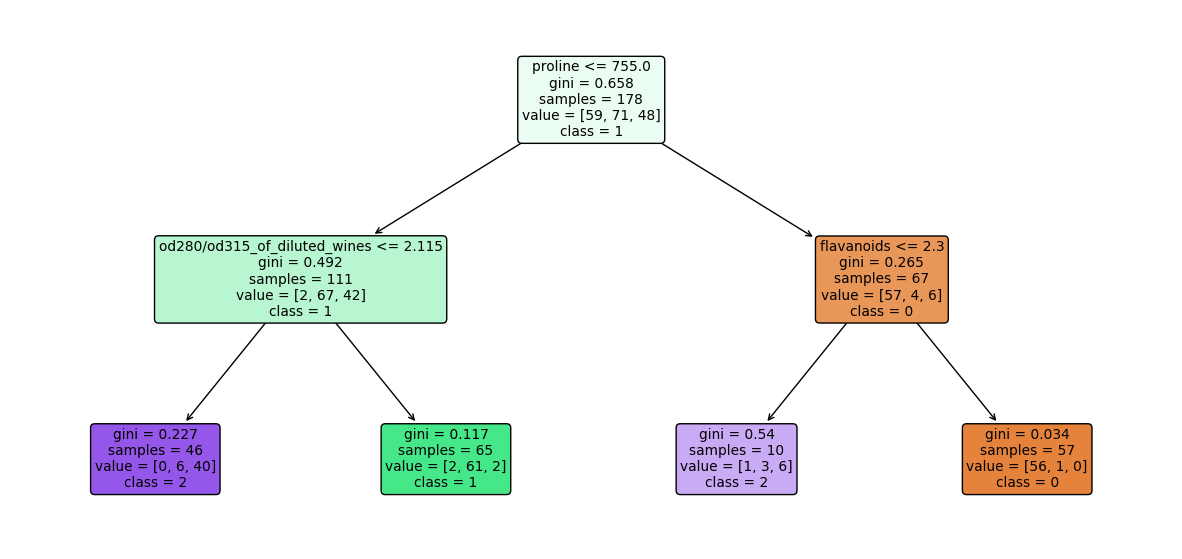

In [64]:
plt.figure(figsize=(15,7))
fn = list(X.columns)
plot_tree(bm_dtr.fit(X, y),
         filled=True,
         rounded=True,
         class_names=['0', '1', '2'],
         feature_names=fn)
plt.show()

conclusion: Decision tree gives us the log loss value of 0.6137408021670152 and feature dominance is of proline, od280/od315_of_diluted_wines and flavanoids

## Random Forest

In [29]:
rf = RandomForestClassifier(random_state=23)
params = {'max_features':[2,3,4,5,6,7]}
gcv_rf = GridSearchCV(rf, param_grid=params,verbose=3,
                   cv=kfold, scoring='neg_log_loss')
gcv_rf.fit(X, y)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...................max_features=2;, score=-0.157 total time=   0.2s
[CV 2/5] END ...................max_features=2;, score=-0.173 total time=   0.0s
[CV 3/5] END ...................max_features=2;, score=-0.092 total time=   0.0s
[CV 4/5] END ...................max_features=2;, score=-0.183 total time=   0.0s
[CV 5/5] END ...................max_features=2;, score=-0.146 total time=   0.0s
[CV 1/5] END ...................max_features=3;, score=-0.161 total time=   0.0s
[CV 2/5] END ...................max_features=3;, score=-0.162 total time=   0.0s
[CV 3/5] END ...................max_features=3;, score=-0.072 total time=   0.0s
[CV 4/5] END ...................max_features=3;, score=-0.165 total time=   0.0s
[CV 5/5] END ...................max_features=3;, score=-0.148 total time=   0.0s
[CV 1/5] END ...................max_features=4;, score=-0.159 total time=   0.0s
[CV 2/5] END ...................max_features=4;, 

In [45]:
print(gcv_rf.best_params_)
print(gcv_rf.best_score_)

{'max_features': 5}
-0.12777136196785277


## Feature importance plot for random forest

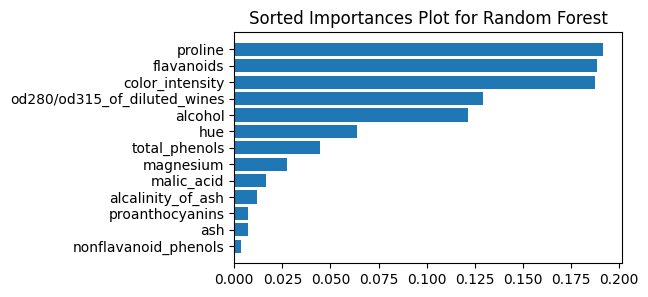

In [54]:

bm_rf = gcv_rf.best_estimator_

imps = bm_rf.feature_importances_
cols = list(X.columns)
imp_df = pd.DataFrame({'feature':cols,
                       'importance':imps})
imp_df.sort_values(by='importance', inplace=True)
plt.figure(figsize=(5,3))
plt.title("Sorted Importances Plot for Random Forest")
plt.barh(imp_df['feature'], imp_df['importance'])
plt.show()

conclusion: Random forest tree gives us the log loss value of 0.12777136196785277 and feature dominance is lot more than the preliminary decision tree.

## XGB Boost

In [77]:
clf = XGBClassifier(random_state=23)
params = {'learning_rate':np.linspace(0.001,0.8, 10),
          'max_depth':[2,3,4,5,6,None],
          'n_estimators':[50,100,150]}
kfold = StratifiedKFold(n_splits=5, 
                        shuffle=True, random_state=23)
cv = GridSearchCV(clf, param_grid=params,cv=kfold,scoring='neg_log_loss')

cv.fit(X,y)
df_cv = pd.DataFrame(cv.cv_results_)

print(cv.best_params_)
print(cv.best_score_)

{'learning_rate': 0.5336666666666667, 'max_depth': 4, 'n_estimators': 100}
-0.09275700129822792


conclusion: XGB boost classifier tree gives us the best log loss value of 0.09275700129822792 as compared to other two.
The log loss value closer to zero is accurate prediction on the other if the log loss is >= 1 it is no more than a random guess.